# Comparison of two image segmentation algorithms for MRI Brain Scans

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import SimpleITK as sitk

# For Chan-Vese
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

from os import listdir
from os.path import isfile, join, isdir

# Download data to work on
%run update_path_to_download_script
from downloaddata import fetch_data as fdata
from myshow import myshow, myshow3d

In [2]:
mypath = 'C:/BMEN509/project/Data/ToUse/'
files = [join(mypath,f + '/' + f + '_t1ce.nii.gz') for f in listdir(mypath) if isdir(join(mypath, f))]

img_T1_0 = sitk.ReadImage(files[0])
img_T1_1 = sitk.ReadImage(files[1])
img_T1_2 = sitk.ReadImage(files[2])
img_T1_3 = sitk.ReadImage(files[3])
img_T1_4 = sitk.ReadImage(files[4])
img_T1_5 = sitk.ReadImage(files[5])
img_T1_6 = sitk.ReadImage(files[6])
img_T1_7 = sitk.ReadImage(files[7])
img_T1_8 = sitk.ReadImage(files[8])
img_T1_9 = sitk.ReadImage(files[9])

# To visualize the labels image in RGB with needs a image with 0-255 range
img_T1_255_0 = sitk.Cast(sitk.RescaleIntensity(img_T1_0), sitk.sitkUInt8)
img_T1_255_1 = sitk.Cast(sitk.RescaleIntensity(img_T1_1), sitk.sitkUInt8)
img_T1_255_2 = sitk.Cast(sitk.RescaleIntensity(img_T1_2), sitk.sitkUInt8)
img_T1_255_3 = sitk.Cast(sitk.RescaleIntensity(img_T1_3), sitk.sitkUInt8)
img_T1_255_4 = sitk.Cast(sitk.RescaleIntensity(img_T1_4), sitk.sitkUInt8)
img_T1_255_5 = sitk.Cast(sitk.RescaleIntensity(img_T1_5), sitk.sitkUInt8)
img_T1_255_6 = sitk.Cast(sitk.RescaleIntensity(img_T1_6), sitk.sitkUInt8)
img_T1_255_7 = sitk.Cast(sitk.RescaleIntensity(img_T1_7), sitk.sitkUInt8)
img_T1_255_8 = sitk.Cast(sitk.RescaleIntensity(img_T1_8), sitk.sitkUInt8)
img_T1_255_9 = sitk.Cast(sitk.RescaleIntensity(img_T1_9), sitk.sitkUInt8)

myshow3d(img_T1_0)
myshow3d(img_T1_1)
myshow3d(img_T1_2)
myshow3d(img_T1_3)
myshow3d(img_T1_4)
myshow3d(img_T1_5)
myshow3d(img_T1_6)
myshow3d(img_T1_7)
myshow3d(img_T1_8)
myshow3d(img_T1_9)



interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

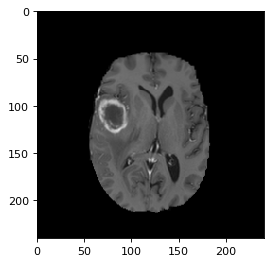

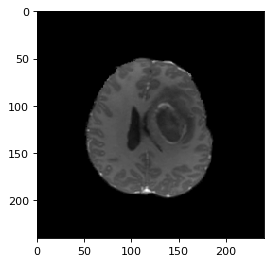

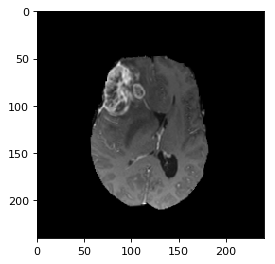

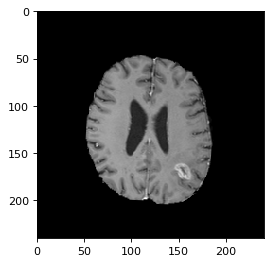

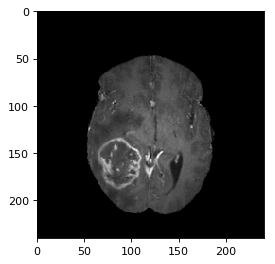

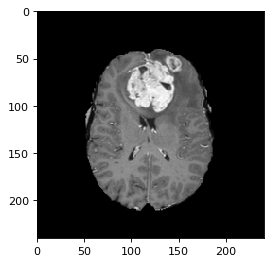

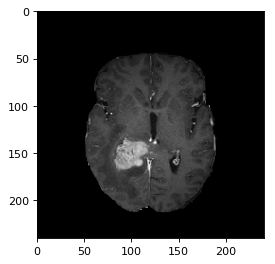

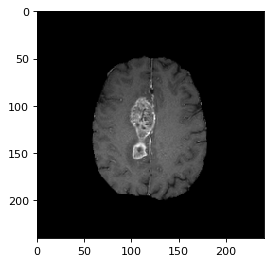

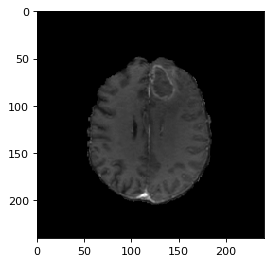

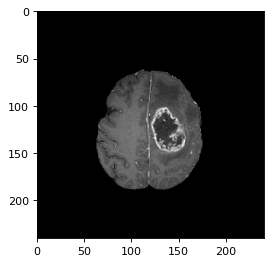

In [3]:
index = [77,95,77,94,68,84,72,104,95,112]

myshow3d(img_T1_0[:,:,index[0]])
myshow3d(img_T1_1[:,:,index[1]])
myshow3d(img_T1_2[:,:,index[2]])
myshow3d(img_T1_3[:,:,index[3]])
myshow3d(img_T1_4[:,:,index[4]])
myshow3d(img_T1_5[:,:,index[5]])
myshow3d(img_T1_6[:,:,index[6]])
myshow3d(img_T1_7[:,:,index[7]])
myshow3d(img_T1_8[:,:,index[8]])
myshow3d(img_T1_9[:,:,index[9]])


## Region Growing Segmentation

The first step of improvement upon the naive thresholding is a class of algorithms called region growing. SimpleITK includes several implementations of region growing algorithms, including:
<ul>
  <li><a href="http://www.itk.org/Doxygen/html/classitk_1_1ConnectedThresholdImageFilter.html">ConnectedThreshold</a></li>
  <li><a href="http://www.itk.org/Doxygen/html/classitk_1_1ConfidenceConnectedImageFilter.html">ConfidenceConnected</a></li>
  <li><a href="http://www.itk.org/Doxygen/html/classitk_1_1VectorConfidenceConnectedImageFilter.html">VectorConfidenceConnected</a></li>
  <li><a href="http://www.itk.org/Doxygen/html/classitk_1_1NeighborhoodConnectedImageFilter.html">NeighborhoodConnected</a></li>
</ul>

In this project, we looked at the Confidence Connected algorithm. At a high level, it starts with a (manually chosen) seed and grows to include points whose intensity is within a pre-set number of standard deviations of the average intensity.

We spoke to a practicing brain surgeon, and he suggested that this algorithm could be improved by starting with multiple seeds to segment the tumour from the edema. This was considered beyond the scope of the project.

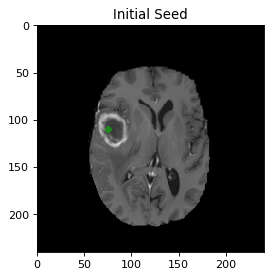

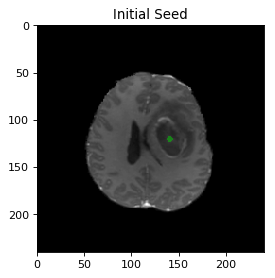

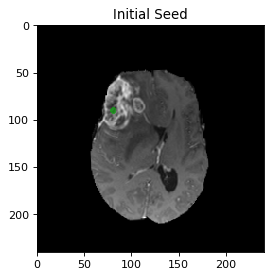

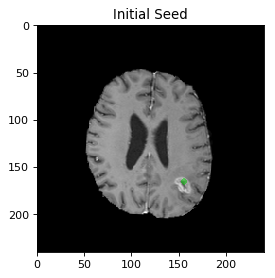

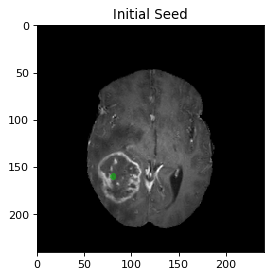

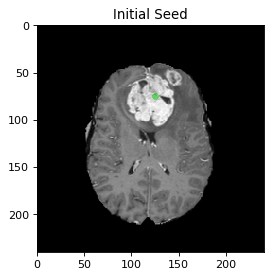

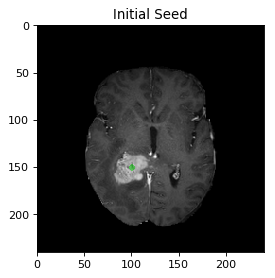

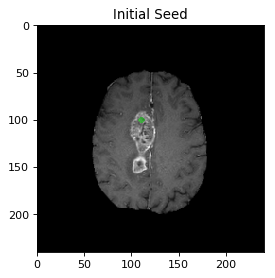

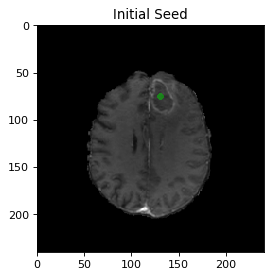

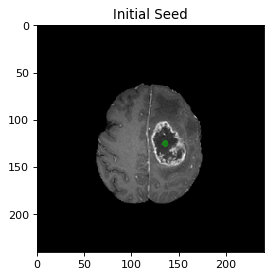

In [4]:
# Initial values need to be set manually by analyzing the images
seeds = [(75,110),(140,120),(80,90),(155,165),(80,160),(125,75),(100,150),(110,100),(130,75),(135,125)]

seed = seeds[0]
im0 = img_T1_0[:,:,index[0]]
seg = sitk.Image(im0.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im0)
seg[seeds[0]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_0 = sitk.Cast(sitk.RescaleIntensity(im0), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_0, seg), "Initial Seed")

seed = seeds[1]
im1 = img_T1_1[:,:,index[1]]
seg = sitk.Image(im1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im1)
seg[seeds[1]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_1 = sitk.Cast(sitk.RescaleIntensity(im1), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_1, seg), "Initial Seed")

seed = seeds[2]
im2 = img_T1_2[:,:,index[2]]
seg = sitk.Image(im2.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im2)
seg[seeds[2]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_2 = sitk.Cast(sitk.RescaleIntensity(im2), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_2, seg), "Initial Seed")

seed = seeds[3]
im3 = img_T1_3[:,:,index[3]]
seg = sitk.Image(im3.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im3)
seg[seeds[3]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_3 = sitk.Cast(sitk.RescaleIntensity(im3), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_3, seg), "Initial Seed")

seed = seeds[4]
im4 = img_T1_4[:,:,index[4]]
seg = sitk.Image(im4.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im4)
seg[seeds[4]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_4 = sitk.Cast(sitk.RescaleIntensity(im4), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_4, seg), "Initial Seed")

seed = seeds[5]
im5 = img_T1_5[:,:,index[5]]
seg = sitk.Image(im5.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im5)
seg[seeds[5]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_5 = sitk.Cast(sitk.RescaleIntensity(im5), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_5, seg), "Initial Seed")

seed = seeds[6]
im6 = img_T1_6[:,:,index[6]]
seg = sitk.Image(im6.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im6)
seg[seeds[6]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_6 = sitk.Cast(sitk.RescaleIntensity(im6), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_6, seg), "Initial Seed")

seed = seeds[7]
im7 = img_T1_7[:,:,index[7]]
seg = sitk.Image(im7.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im7)
seg[seeds[7]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_7 = sitk.Cast(sitk.RescaleIntensity(im7), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_7, seg), "Initial Seed")

seed = seeds[8]
im8 = img_T1_8[:,:,index[8]]
seg = sitk.Image(im8.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im8)
seg[seeds[8]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_8 = sitk.Cast(sitk.RescaleIntensity(im8), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_8, seg), "Initial Seed")

seed = seeds[9]
im9 = img_T1_9[:,:,index[9]]
seg = sitk.Image(im9.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(im9)
seg[seeds[9]] = 1
seg = sitk.BinaryDilate(seg, 3)
img_T1_255_9 = sitk.Cast(sitk.RescaleIntensity(im9), sitk.sitkUInt8)
myshow(sitk.LabelOverlay(img_T1_255_9, seg), "Initial Seed")



Improving upon this is the ConfidenceConnected filter, which uses the initial seed or current segmentation to estimate the threshold range.

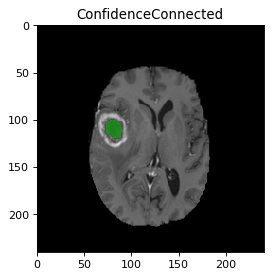

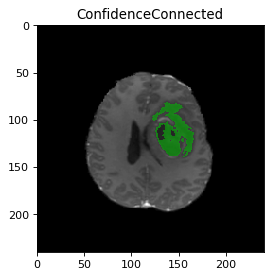

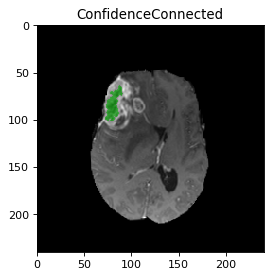

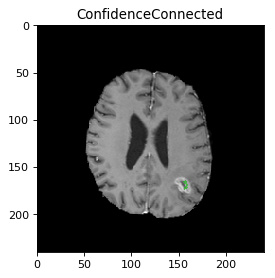

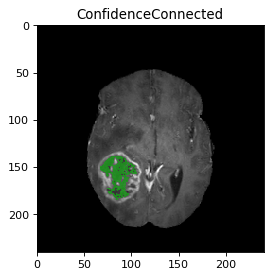

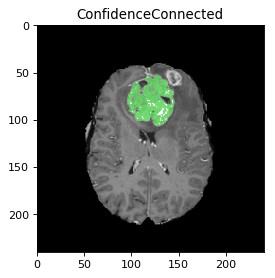

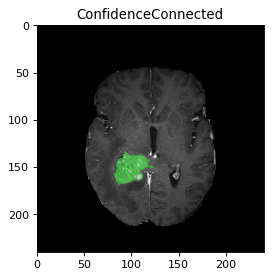

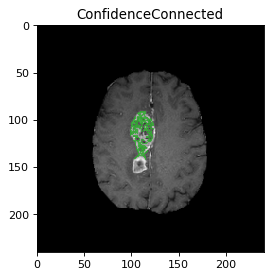

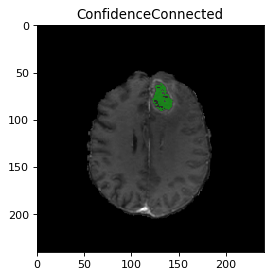

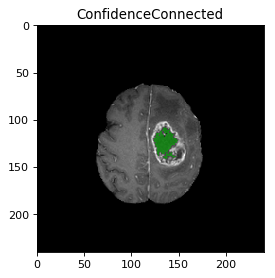

In [5]:
seg = sitk.ConfidenceConnected(im0, seedList=[seeds[0]],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_0, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im1, seedList=[seeds[1]],
                                   numberOfIterations=3,
                                   multiplier=2.1,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_1, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im2, seedList=[seeds[2]],
                                   numberOfIterations=1,
                                   multiplier=3.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_2, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im3, seedList=[seeds[3]],
                                   numberOfIterations=1,
                                   multiplier=1.6,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_3, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im4, seedList=[seeds[4]],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_4, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im5, seedList=[seeds[5]],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_5, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im6, seedList=[seeds[6]],
                                   numberOfIterations=1,
                                   multiplier=2.05,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_6, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im7, seedList=[seeds[7]],
                                   numberOfIterations=1,
                                   multiplier=2.0,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_7, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im8, seedList=[seeds[8]],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_8, seg), "ConfidenceConnected")

seg = sitk.ConfidenceConnected(im9, seedList=[seeds[9]],
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
myshow(sitk.LabelOverlay(img_T1_255_9, seg), "ConfidenceConnected")


## Chan-Vese

The Chan-Vese algorithm is a global algorithm based on optimizing an energy functional. Certain parameters define the functional (mu, lambda1, and lambda2 below). The interesting thing about Chan-Vese is that it makes no assumptions about the edges a priori. Most edge-detection algorithms are based on 

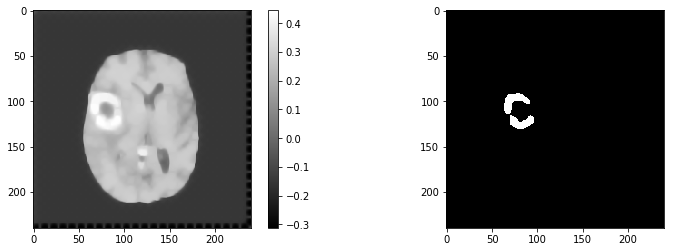

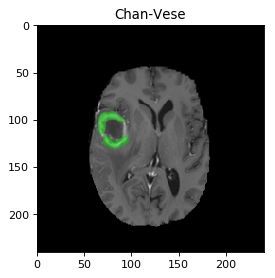

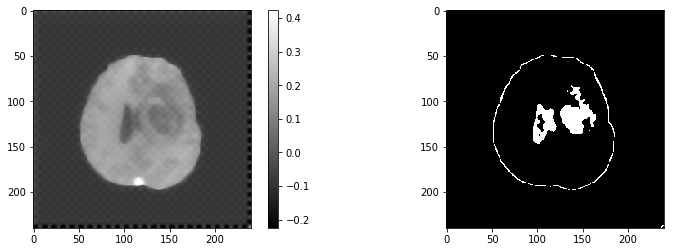

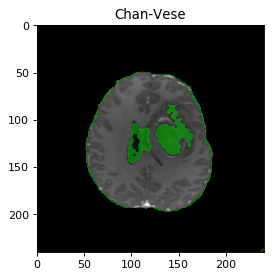

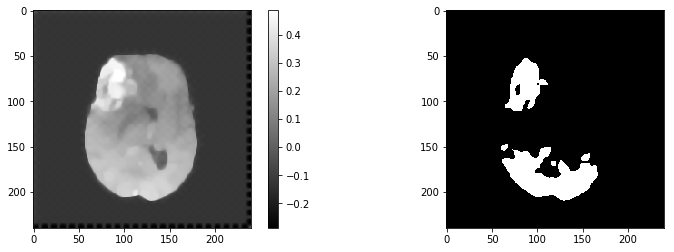

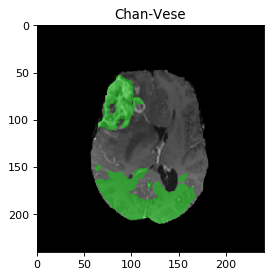

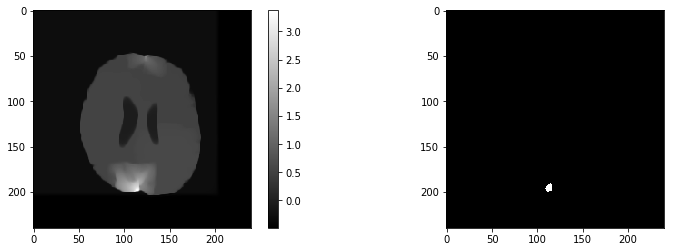

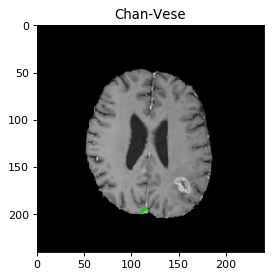

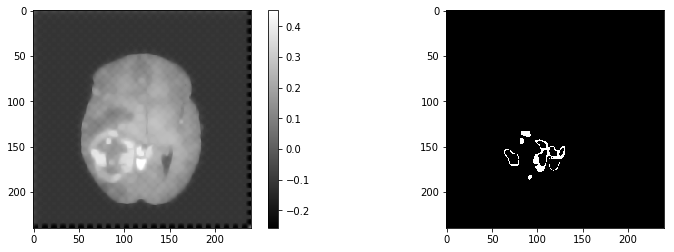

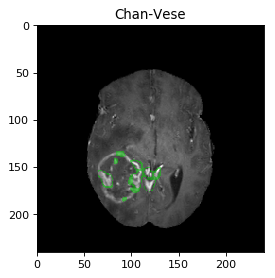

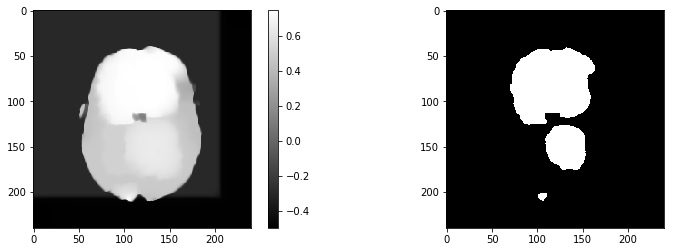

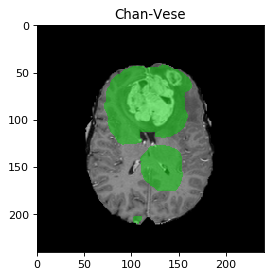

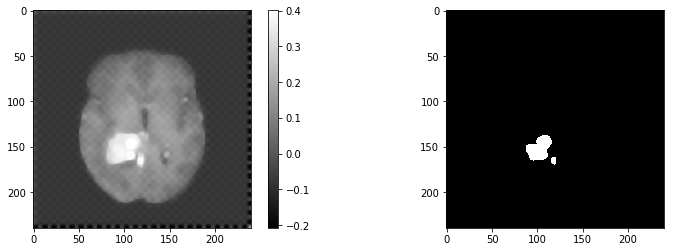

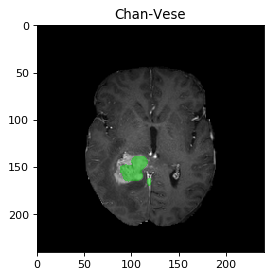

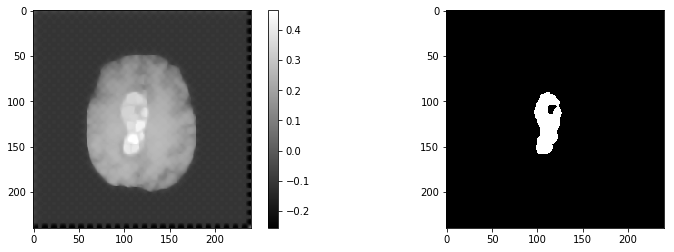

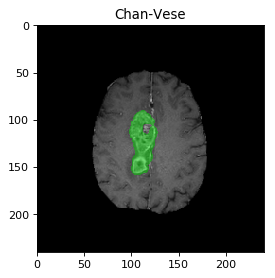

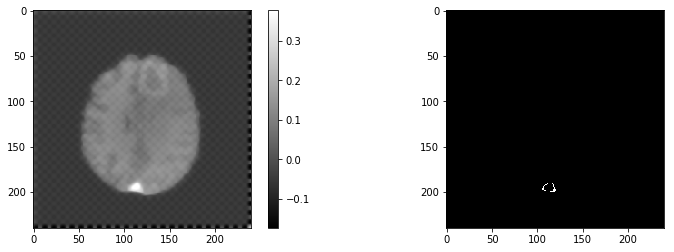

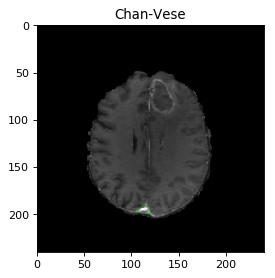

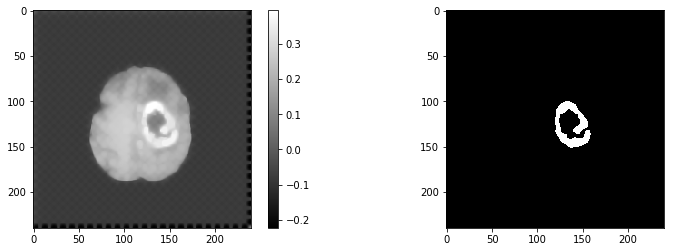

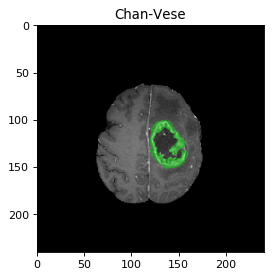

In [7]:
## Need to collapse an RGB image into Grayscale.
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# print(im0.GetSize())

def findChanVese(img, lowerLimit, upperLimit):
    
    IM = sitk.GetArrayFromImage(img)

    start = np.full(np.shape(IM),0)
    for i in range(100,140):
        for j in range(100,140):
            start[i,j] = 0.5

    cv = chan_vese(IM, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                   dt=0.5, init_level_set='checkerboard', extended_output=True)

    fig, axes = plt.subplots(1, 2, figsize=(40/3, 4))
    ax = axes.flatten()

    l = cv[1]
    im = ax[0].imshow(l)
    fig.colorbar(im, ax=ax[0])

    m0 = np.full(np.shape(l),0)
    m0[np.where(np.bitwise_and(l < upperLimit, l > lowerLimit))] = 1
    ax[1].imshow(m0)

    bas0 = sitk.GetImageFromArray(IM)
    lab0 = sitk.GetImageFromArray(m0)

    myshow(sitk.LabelOverlay(bas0, lab0), "Chan-Vese")

    
findChanVese(img_T1_255_0, 0.4, 1)
findChanVese(img_T1_255_1, 0.0, 0.1)
findChanVese(img_T1_255_2, 0.28, 1)
findChanVese(img_T1_255_3, 2.5, 5)
findChanVese(img_T1_255_4, 0.3, 0.35)
findChanVese(img_T1_255_5, 0.62, 1)
findChanVese(img_T1_255_6, 0.35, 1)
findChanVese(img_T1_255_7, 0.30, 1)
findChanVese(img_T1_255_8, 0.25, 0.3)
findChanVese(img_T1_255_9, 0.3, 1)
